# Taking long data for prediction with hours as timestamp

In [511]:
import pandas as pd
import numpy as np


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns

from xgboost import XGBRegressor

In [512]:
rs = 123

In [513]:
data = pd.read_csv('../data/train_long.csv')

In [514]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,hours,day,target
0,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,45.126304
1,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,45.126304
2,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,45.126304
3,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,45.126304
4,ID_train_0,C,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,45.126304
...,...,...,...,...,...,...,...,...,...,...,...
1880214,ID_train_9999,C,20.716667,0.0,0.910000,336.823774,0.775833,87.722500,116.0,5.0,127.983333
1880215,ID_train_9999,C,21.075000,0.0,0.871667,82.983274,0.325833,87.740833,117.0,5.0,127.983333
1880216,ID_train_9999,C,21.541667,0.0,0.785833,17.870593,0.425000,87.768333,118.0,5.0,127.983333
1880217,ID_train_9999,C,21.483333,0.0,0.736667,334.666143,0.701667,87.805833,119.0,5.0,127.983333


only data with data for rain

In [515]:
data = data[data['precip'] >= 0]

only data of day 5

In [516]:
data = data[data['day'] == 5]

drop rain column

In [517]:
# data = data.drop('precip', axis=1)

In [518]:
y = np.log10(data['target'] +1)
X = data.iloc[:, 2:-2]

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)

In [520]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [521]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [522]:
y_pred = xgb.predict(X_test)

In [523]:
mean_squared_error(y_test, y_pred, squared=False)
mean_squared_error(np.power(10, y_test), np.power(10, y_pred), squared=False)

36.479103701920124

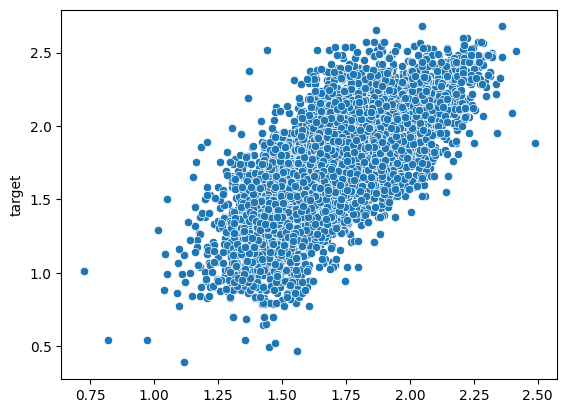

In [524]:
sns.scatterplot(x=y_pred, y=y_test);